# Final Exam - In Class Key (65 pts)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
### 1. (5 pts) Plot the segment of the EEG recording loaded below corresponding to times from 0-500 ms. Label your axes and include units (EEG recording in $\mu V$, time in $ms$).

In [5]:
import pickle

with open("eeg.dat", "rb") as f:
    time_ms, eeg_uV = pickle.load(f)

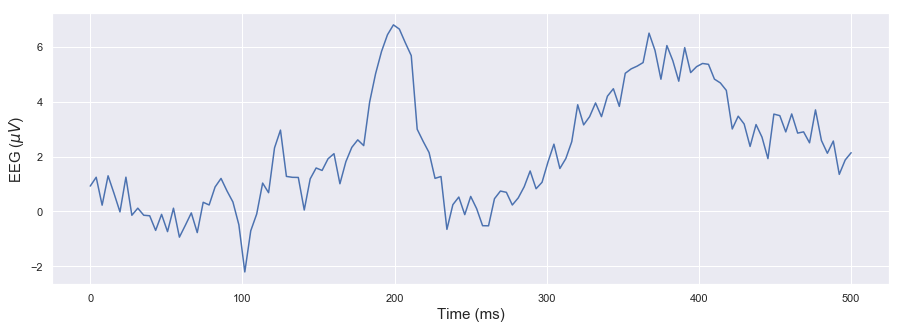

In [6]:
a = np.where(time_ms >= 0)[0][0]
b = np.where(time_ms > 500)[0][0]

plt.figure(figsize=(15, 5))
plt.plot(time_ms[a:b], eeg_uV[a:b])
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel(r'EEG ($\mu V$)', fontsize=15);

---
### 2. (5 pts) What are the sample and Nyquist frequencies for the EEG in #1 above?

In [9]:
sample_interval_ms = time_ms[1] - time_ms[0]
sample_freq_Hz = 1000 / sample_interval_ms
nyquist_freq_Hz = sample_freq_Hz / 2

print(f'Sample frequency = {sample_freq_Hz} Hz')
print(f'Nyquist frequency = {nyquist_freq_Hz} Hz')

Sample frequency = 256.0 Hz
Nyquist frequency = 128.0 Hz


---
### 3. (5 pts) If you were to downsample the above EEG by keeping only every 10th data point, what is the highest frequency component that the downsampled EEG can include?

In [10]:
print(f'{sample_freq_Hz / 10 / 2} Hz')

12.8 Hz


---
### 4. (5 pts) Downsample the above EEG to every 10th data point without introducing artifacts due to asliasing, and plot the original EEG overlaid with the appropriately downsampled version. Label axes with units.

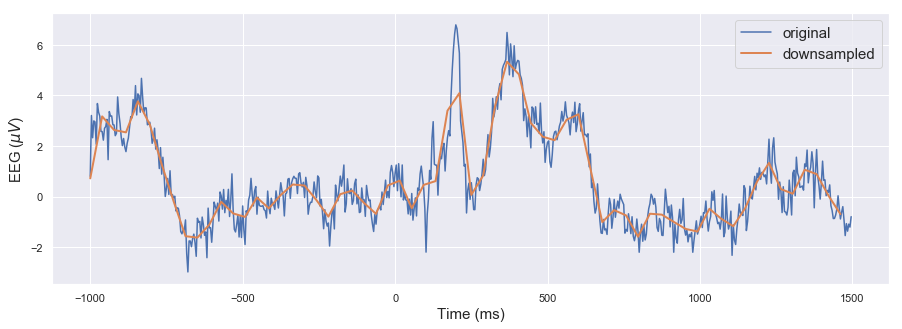

In [12]:
from scipy import signal

sub_time_ms = time_ms[::10]
sub_eeg_uV = signal.decimate(eeg_uV, 10)

plt.figure(figsize=(15, 5))
plt.plot(time_ms, eeg_uV, label='original')
plt.plot(sub_time_ms, sub_eeg_uV, lw=2, label='downsampled')
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel(r'EEG ($\mu V$)', fontsize=15)
plt.legend(fontsize=15);

---
### 5. (5 pts) Apply a 20 Hz lowpass filter to the original (not downsampled) EEG, and plot the original and filtered EEGs overlaid. Label axes with units.

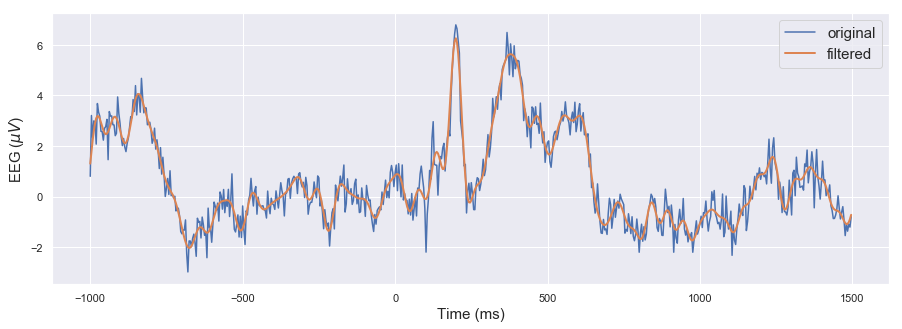

In [14]:
lowpass = signal.firwin(101, 20, nyq=nyquist_freq_Hz)

filtered_eeg_uV = np.convolve(eeg_uV, lowpass, 'same')

plt.figure(figsize=(15, 5))
plt.plot(time_ms, eeg_uV, label='original')
plt.plot(time_ms, filtered_eeg_uV, lw=2, label='filtered')
plt.xlabel('Time (ms)', fontsize=15)
plt.ylabel(r'EEG ($\mu V$)', fontsize=15)
plt.legend(fontsize=15);

---
### 6. (5 pts) Plot the power spectral density of the original and filtered EEGs from #5 above. Overlay both plots on a single graph. Make sure the graph indicates which is which.

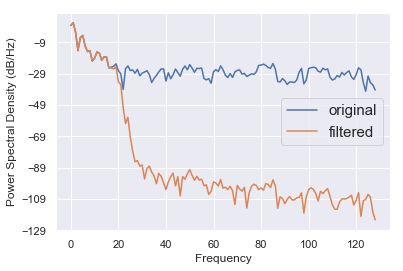

In [20]:
plt.psd(eeg_uV, Fs=sample_freq_Hz, label='original')
plt.psd(filtered_eeg_uV, Fs=sample_freq_Hz, label='filtered')
plt.legend(fontsize=15);

---
### 7. (5 pts) Make a scatter plot of the $(x, y)$ data points given below, and report the covariance and correlation between their $x$ and $y$ components.

In [44]:
# (x, y) data points
np.random.seed(0)
x = np.random.randn(100)
y = -0.82 * x + np.random.randn(len(x))

XY covariance = -0.724
XY correlation = -0.569


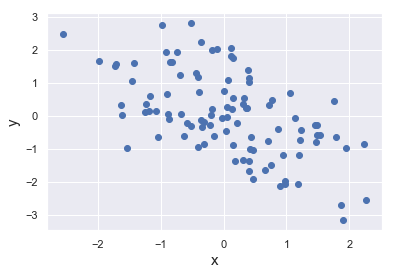

In [45]:
plt.scatter(x, y)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

cov = np.cov(x, y)[0, 1]
cor = np.corrcoef(x, y)[0, 1]

print(f'XY covariance = {cov:.3f}')
print(f'XY correlation = {cor:.3f}')

---
### 8. (5 pts) Use ordinary least squares linear regression to fit a line to the $(x, y)$ data points from #7 above. Plot the fit line overlaid on top of the data points and report the slope of the fit line.

Slope of fit line = [-0.70530157]


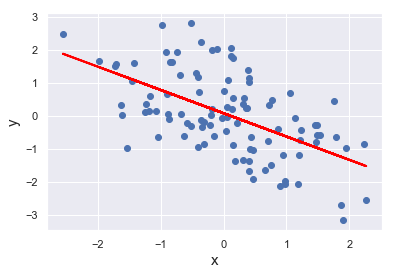

In [46]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

yfit = model.predict(x)

print(f'Slope of fit line = {model.coef_}')

plt.scatter(x, y)
plt.plot(x, yfit, lw=2, color='red')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15);

---
### 9. (5 pts) Report the $R^2$ value for the linear regression fit in #8 above, and explain in your own words what it means.

In [47]:
R2 = model.score(x, y)

print(f'R^2 = {R2:.3f}')
print(f'The linear fit explains {R2*100:.1f}% of the variability in the data.')

R^2 = 0.323
The linear fit explains 32.3% of the variability in the data.


---
### 10. (5 pts) Use a list comprehension to make a list containing the cubed root of each even number in the range 20 to 30.

In [48]:
[
    i**(1/3)
    for i in range(20, 31)
    if i % 2 == 0
]

[2.7144176165949063,
 2.802039330655387,
 2.8844991406148166,
 2.9624960684073702,
 3.0365889718756622,
 3.1072325059538586]

---
### 11. (5 pts) In your own words, explain what a $p$-value is.

A p-value is the probability of observing a value at least as extreme as the value that was observed if the null hypothesis is true.

---
### 12. (5 pts) You record the open probability of a single ion channel at 0 and +50 mV. You repeat the experiment for five different single-channel recordings (see data below). Based soley on these data, would you conclude that the channel is gated by voltage? Report your null and alternative hypotheses, your p-value ans whether or not you reject your null hypothesis.

In [12]:
Po_0mV = np.array([0.49502864, 0.59442892, 0.40187473, 0.2487931 , 0.70953765])
Po_50mV = np.array([0.84604619, 0.44750292, 0.69168295, 0.55909163, 0.83974497])

Null hypothesis ($H_0$): Channel open probability is independent of voltage.

Alternative hypothesis ($H_a$): Channel open probability depends on voltage.

In [20]:
t, p = st.ttest_rel(Po_0mV, Po_50mV)

print(f"p-value for null hypothesis is {p:.2f}")

p-value for null hypothesis is 0.11


Do not reject $H_0$ as $p > 0.05$.

Thus, we cannot rule out that the channel is voltage-independent (*i.e.* not gated by voltage).

---
### 13. (5 pts) Course evaluation. Please give me your honest opinions and/or suggestions.